In [1]:
pip install face-alignment

  Created wheel for face-alignment: filename=face_alignment-1.3.4-py2.py3-none-any.whl size=27859 sha256=877b2f26799c8475095f67e368fc89d9a163a85083b18543432343150f057dae
  Stored in directory: /root/.cache/pip/wheels/a1/4d/d9/fa80a2341395ce73765c09eef97b262a048b2a763c9b689c2c
Successfully built face-alignment


In [2]:
import numpy as np
import os
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import collections

import face_alignment
from skimage import io
from skimage.transform import rescale, resize

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Used for the cropping method
def dilate_bbox(bbox, scale=0.25):
    x,y,w,h = bbox
    c = np.array([x+w/2, y+h/2])
    s = np.max([w, h])
    s = s * (1 + scale)
    
    x, y = c - s/2
    new_box = np.array([x,y,s,s]).clip(0)
    return new_box

In [5]:
data_directory = '/content/drive/MyDrive/Colab Notebooks/VLST209/Cubist Works/'

In [ ]:
#Basic 2D recognition on cubist works
for artist in os.listdir(data_directory):
  print(artist)
  root = data_directory + artist
  output_dir = '/content/drive/MyDrive/Colab Notebooks/VLST209/Results2/' + artist + '_face_demo'
  fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, face_detector='sfd', device='cpu')

  if not os.path.exists(output_dir):
      os.mkdir(output_dir)
    
  count = 0
  imgfiles = sorted(glob.glob(root + '/*'))

  for imgfile in tqdm(imgfiles):
    try:
      img = io.imread(imgfile)[:,:,:3]
      detected_faces = fa.face_detector.detect_from_image(img)

      print(len(detected_faces))
    
      for box in detected_faces:
          x1,y1,x2,y2,c = box # c for confidence
            
          box = np.array([x1,y1,x2-x1,y2-y1])
          x,y,w,h = dilate_bbox(box, scale=0.50).astype(int)
        
          if np.min([w,h])<100:
              continue
  
          crop = img[y:y+h, x:x+w]
          plt.imsave(output_dir+'/{:04d}.png'.format(count), crop)

          count += 1
    except Exception as inst:
          print(inst) 
          continue

Pablo Picasso


  6%|▌         | 1/18 [00:09<02:33,  9.04s/it]

0


 11%|█         | 2/18 [00:09<01:45,  6.57s/it]

0


 17%|█▋        | 3/18 [00:12<01:20,  5.34s/it]

0


 22%|██▏       | 4/18 [00:20<01:28,  6.32s/it]

1


 28%|██▊       | 5/18 [00:36<01:58,  9.10s/it]

0


 33%|███▎      | 6/18 [00:44<01:43,  8.63s/it]

0


 39%|███▉      | 7/18 [00:51<01:29,  8.17s/it]

1


 44%|████▍     | 8/18 [01:05<01:41, 10.14s/it]

0


 50%|█████     | 9/18 [01:14<01:27,  9.75s/it]

0


 56%|█████▌    | 10/18 [01:23<01:16,  9.51s/it]

0


 61%|██████    | 11/18 [01:28<00:56,  8.13s/it]

0


 67%|██████▋   | 12/18 [01:30<00:38,  6.37s/it]

0


 72%|███████▏  | 13/18 [01:39<00:34,  6.98s/it]

0


 78%|███████▊  | 14/18 [01:56<00:39,  9.97s/it]

0


 83%|████████▎ | 15/18 [02:04<00:28,  9.54s/it]

0


 89%|████████▉ | 16/18 [02:10<00:16,  8.39s/it]

0


 94%|█████████▍| 17/18 [02:14<00:07,  7.03s/it]

0


100%|██████████| 18/18 [02:21<00:00,  7.87s/it]

0
Henri Le Fauconnier



 25%|██▌       | 1/4 [00:03<00:09,  3.05s/it]

0


 50%|█████     | 2/4 [00:12<00:10,  5.07s/it]

2
3


100%|██████████| 4/4 [00:23<00:00,  5.88s/it]

2
Salvador Dali



 33%|███▎      | 1/3 [00:13<00:26, 13.31s/it]

0


 67%|██████▋   | 2/3 [00:26<00:13, 13.16s/it]

0


100%|██████████| 3/3 [00:39<00:00, 13.02s/it]

0
Robert Delaunay



 33%|███▎      | 1/3 [00:02<00:04,  2.15s/it]

0


 67%|██████▋   | 2/3 [00:04<00:02,  2.32s/it]

0


100%|██████████| 3/3 [00:07<00:00,  2.56s/it]

1
Fernand Leluger



  2%|▏         | 1/49 [00:12<10:20, 12.93s/it]

0


  4%|▍         | 2/49 [00:30<11:07, 14.21s/it]

1


  6%|▌         | 3/49 [00:41<10:17, 13.43s/it]

0


  8%|▊         | 4/49 [00:54<09:55, 13.23s/it]

0


 10%|█         | 5/49 [01:07<09:44, 13.28s/it]

0


 12%|█▏        | 6/49 [01:20<09:25, 13.14s/it]

0


 14%|█▍        | 7/49 [01:34<09:20, 13.34s/it]

1
1


 16%|█▋        | 8/49 [01:47<09:02, 13.23s/it]

1


 20%|██        | 10/49 [02:14<08:42, 13.40s/it]

1


 22%|██▏       | 11/49 [02:25<08:06, 12.80s/it]

0
1


 24%|██▍       | 12/49 [02:38<07:57, 12.90s/it]

3


 29%|██▊       | 14/49 [03:05<07:38, 13.10s/it]

0


 31%|███       | 15/49 [03:19<07:32, 13.31s/it]

0


 33%|███▎      | 16/49 [03:29<06:50, 12.44s/it]

0


 35%|███▍      | 17/49 [03:43<06:54, 12.95s/it]

0


 37%|███▋      | 18/49 [03:56<06:39, 12.88s/it]

0


 39%|███▉      | 19/49 [04:05<05:52, 11.75s/it]

0


 41%|████      | 20/49 [04:19<06:02, 12.51s/it]

0


 43%|████▎     | 21/49 [04:32<05:54, 12.66s/it]

0
1


 47%|████▋     | 23/49 [05:24<08:24, 19.40s/it]

1


 49%|████▉     | 24/49 [05:36<07:06, 17.07s/it]

1


 51%|█████     | 25/49 [05:49<06:22, 15.92s/it]

1


 53%|█████▎    | 26/49 [06:03<05:50, 15.22s/it]

0


 55%|█████▌    | 27/49 [06:16<05:23, 14.72s/it]

0


 57%|█████▋    | 28/49 [06:30<04:59, 14.27s/it]

0


 59%|█████▉    | 29/49 [06:41<04:25, 13.29s/it]

0


 61%|██████    | 30/49 [06:53<04:04, 12.87s/it]

0


 63%|██████▎   | 31/49 [06:59<03:15, 10.87s/it]

0


 65%|██████▌   | 32/49 [07:05<02:41,  9.47s/it]

0


 67%|██████▋   | 33/49 [07:23<03:15, 12.20s/it]

0


 69%|██████▉   | 34/49 [07:37<03:10, 12.68s/it]

0


 71%|███████▏  | 35/49 [07:49<02:51, 12.25s/it]

0


 73%|███████▎  | 36/49 [07:56<02:18, 10.68s/it]

0


 76%|███████▌  | 37/49 [08:01<01:48,  9.08s/it]

0


 78%|███████▊  | 38/49 [08:15<01:56, 10.63s/it]

0


 80%|███████▉  | 39/49 [08:29<01:54, 11.48s/it]

3


 82%|████████▏ | 40/49 [08:42<01:47, 11.93s/it]

0


 84%|████████▎ | 41/49 [08:53<01:35, 11.90s/it]

0


 86%|████████▌ | 42/49 [09:06<01:24, 12.01s/it]

2


 88%|████████▊ | 43/49 [09:17<01:10, 11.67s/it]

0


 90%|████████▉ | 44/49 [09:30<01:01, 12.27s/it]

0


 92%|█████████▏| 45/49 [09:36<00:41, 10.36s/it]

0


 94%|█████████▍| 46/49 [09:48<00:32, 10.68s/it]

0


 96%|█████████▌| 47/49 [10:01<00:22, 11.45s/it]

1
3


100%|██████████| 49/49 [10:41<00:00, 13.09s/it]

0
Jean Metzinger



  7%|▋         | 1/15 [00:10<02:22, 10.19s/it]

1


 13%|█▎        | 2/15 [00:26<02:34, 11.89s/it]

0


 20%|██        | 3/15 [00:32<02:01, 10.15s/it]

0


 27%|██▋       | 4/15 [00:43<01:56, 10.62s/it]

0


 33%|███▎      | 5/15 [00:58<01:59, 11.97s/it]

2


 40%|████      | 6/15 [01:10<01:46, 11.78s/it]

1


 47%|████▋     | 7/15 [01:27<01:47, 13.49s/it]

2


 53%|█████▎    | 8/15 [01:37<01:25, 12.27s/it]

0


 60%|██████    | 9/15 [01:40<00:57,  9.58s/it]

1


 67%|██████▋   | 10/15 [01:45<00:40,  8.10s/it]

0


 73%|███████▎  | 11/15 [01:46<00:24,  6.08s/it]

too many indices for array: array is 2-dimensional, but 3 were indexed


 80%|████████  | 12/15 [01:47<00:13,  4.60s/it]

0


 87%|████████▋ | 13/15 [01:55<00:11,  5.65s/it]

0


 93%|█████████▎| 14/15 [02:12<00:08,  8.99s/it]

0
2


100%|██████████| 15/15 [02:27<00:00,  9.81s/it]


Piet Mondrian


100%|██████████| 1/1 [00:08<00:00,  8.79s/it]

0
Juan Gris



  5%|▌         | 1/19 [00:08<02:38,  8.79s/it]

0


 11%|█         | 2/19 [00:15<02:20,  8.28s/it]

0


 16%|█▌        | 3/19 [00:23<02:07,  7.96s/it]

0


 21%|██        | 4/19 [00:32<02:06,  8.44s/it]

0


 26%|██▋       | 5/19 [00:40<01:54,  8.20s/it]

0


 32%|███▏      | 6/19 [00:50<01:52,  8.65s/it]

0


 37%|███▋      | 7/19 [00:58<01:42,  8.56s/it]

0


 42%|████▏     | 8/19 [01:07<01:35,  8.67s/it]

0


 47%|████▋     | 9/19 [01:16<01:28,  8.84s/it]

0


 53%|█████▎    | 10/19 [01:23<01:14,  8.27s/it]

0


 58%|█████▊    | 11/19 [01:30<01:04,  8.01s/it]

0


 63%|██████▎   | 12/19 [01:40<01:00,  8.64s/it]

0


 68%|██████▊   | 13/19 [01:49<00:50,  8.49s/it]

0


 74%|███████▎  | 14/19 [02:05<00:54, 10.86s/it]

0


 79%|███████▉  | 15/19 [02:14<00:41, 10.40s/it]

0


 84%|████████▍ | 16/19 [02:45<00:49, 16.39s/it]

1


 89%|████████▉ | 17/19 [03:01<00:32, 16.38s/it]

0


 95%|█████████▍| 18/19 [03:09<00:13, 13.81s/it]

0


100%|██████████| 19/19 [03:22<00:00, 10.66s/it]

0
George Braques



  0%|          | 0/5 [00:00<?, ?it/s]

2


 40%|████      | 2/5 [00:20<00:40, 13.52s/it]

0


 60%|██████    | 3/5 [00:33<00:26, 13.31s/it]

1


 80%|████████  | 4/5 [00:41<00:11, 11.60s/it]

0


100%|██████████| 5/5 [00:42<00:00,  8.43s/it]

0
Albert Gleizes



  9%|▉         | 1/11 [00:03<00:38,  3.87s/it]

0


 18%|█▊        | 2/11 [00:12<00:48,  5.43s/it]

3


 27%|██▋       | 3/11 [00:26<01:02,  7.75s/it]

0


 36%|███▋      | 4/11 [00:33<00:52,  7.50s/it]

0


 45%|████▌     | 5/11 [00:40<00:45,  7.56s/it]

2


 55%|█████▍    | 6/11 [00:58<00:53, 10.72s/it]

0


 64%|██████▎   | 7/11 [01:07<00:40, 10.04s/it]

0


 73%|███████▎  | 8/11 [01:22<00:34, 11.49s/it]

0


 82%|████████▏ | 9/11 [01:29<00:20, 10.21s/it]

0


 91%|█████████ | 10/11 [01:39<00:10, 10.20s/it]

0


100%|██████████| 11/11 [01:41<00:00,  9.24s/it]

0
_Picasso No Name



  1%|          | 1/101 [00:07<12:10,  7.31s/it]

0


  2%|▏         | 2/101 [00:15<12:39,  7.67s/it]

0


  3%|▎         | 3/101 [00:23<12:31,  7.67s/it]

1


  4%|▍         | 4/101 [00:31<12:44,  7.88s/it]

0


  5%|▍         | 5/101 [00:40<12:45,  7.97s/it]

0


  6%|▌         | 6/101 [00:48<12:39,  8.00s/it]

0


  7%|▋         | 7/101 [00:55<12:11,  7.78s/it]

1


  8%|▊         | 8/101 [01:02<11:52,  7.66s/it]

0


  9%|▉         | 9/101 [01:10<11:34,  7.55s/it]

0


 10%|▉         | 10/101 [01:16<11:02,  7.28s/it]

0


 11%|█         | 11/101 [01:25<11:24,  7.60s/it]

0


 12%|█▏        | 12/101 [01:30<10:12,  6.88s/it]

0


 13%|█▎        | 13/101 [01:37<10:12,  6.97s/it]

0


 14%|█▍        | 14/101 [01:47<11:29,  7.93s/it]

0


 15%|█▍        | 15/101 [01:55<11:15,  7.85s/it]

0
1


 16%|█▌        | 16/101 [02:03<11:17,  7.98s/it]

1


 18%|█▊        | 18/101 [02:21<11:35,  8.37s/it]

0


 19%|█▉        | 19/101 [02:29<11:20,  8.30s/it]

0


 20%|█▉        | 20/101 [02:37<11:20,  8.40s/it]

0


 21%|██        | 21/101 [02:45<10:47,  8.10s/it]

0


 22%|██▏       | 22/101 [02:53<10:33,  8.02s/it]

0


 23%|██▎       | 23/101 [03:00<10:05,  7.77s/it]

0


 24%|██▍       | 24/101 [03:02<07:51,  6.12s/it]

0


 25%|██▍       | 25/101 [03:11<08:45,  6.92s/it]

1


 26%|██▌       | 26/101 [03:20<09:21,  7.48s/it]

0


 27%|██▋       | 27/101 [03:28<09:32,  7.73s/it]

0


 28%|██▊       | 28/101 [03:36<09:40,  7.95s/it]

0


 29%|██▊       | 29/101 [03:46<10:11,  8.49s/it]

0


 30%|██▉       | 30/101 [03:55<10:18,  8.71s/it]

0


 31%|███       | 31/101 [04:02<09:26,  8.09s/it]

0


 32%|███▏      | 32/101 [04:10<09:19,  8.10s/it]

0


 33%|███▎      | 33/101 [04:19<09:17,  8.20s/it]

0


 34%|███▎      | 34/101 [04:27<09:08,  8.19s/it]

0


 35%|███▍      | 35/101 [04:35<09:10,  8.34s/it]

0


 36%|███▌      | 36/101 [04:45<09:23,  8.67s/it]

0
1


 38%|███▊      | 38/101 [05:01<08:38,  8.23s/it]

0


 39%|███▊      | 39/101 [05:08<08:13,  7.97s/it]

0


 40%|███▉      | 40/101 [05:15<07:52,  7.75s/it]

0


 41%|████      | 41/101 [05:22<07:33,  7.56s/it]

1


 42%|████▏     | 42/101 [05:31<07:46,  7.90s/it]

0


 43%|████▎     | 43/101 [05:39<07:37,  7.89s/it]

0


 44%|████▎     | 44/101 [05:46<07:14,  7.63s/it]

0
1


 46%|████▌     | 46/101 [06:02<07:01,  7.66s/it]

0


 47%|████▋     | 47/101 [06:11<07:16,  8.09s/it]

0


 48%|████▊     | 48/101 [06:19<07:03,  8.00s/it]

1


 49%|████▊     | 49/101 [06:27<07:07,  8.21s/it]

0


 50%|████▉     | 50/101 [06:36<07:05,  8.33s/it]

0
1


 51%|█████▏    | 52/101 [06:54<07:04,  8.67s/it]

0


 52%|█████▏    | 53/101 [07:03<06:56,  8.67s/it]

0


 53%|█████▎    | 54/101 [07:11<06:41,  8.55s/it]

0


 54%|█████▍    | 55/101 [07:16<05:43,  7.47s/it]

1


 55%|█████▌    | 56/101 [07:22<05:17,  7.05s/it]

0


 56%|█████▋    | 57/101 [07:30<05:29,  7.49s/it]

0


 57%|█████▋    | 58/101 [07:38<05:21,  7.47s/it]

1


 58%|█████▊    | 59/101 [07:46<05:18,  7.58s/it]

0


 59%|█████▉    | 60/101 [07:57<05:52,  8.60s/it]

0


 60%|██████    | 61/101 [07:59<04:33,  6.84s/it]

0


 61%|██████▏   | 62/101 [08:02<03:34,  5.51s/it]

0


 62%|██████▏   | 63/101 [08:09<03:48,  6.01s/it]

0


 63%|██████▎   | 64/101 [08:17<04:10,  6.77s/it]

0


 64%|██████▍   | 65/101 [08:25<04:12,  7.03s/it]

0


 65%|██████▌   | 66/101 [08:33<04:18,  7.37s/it]

0


 66%|██████▋   | 67/101 [08:41<04:12,  7.43s/it]

0


 67%|██████▋   | 68/101 [08:51<04:28,  8.14s/it]

2


 68%|██████▊   | 69/101 [08:59<04:26,  8.33s/it]

0


 69%|██████▉   | 70/101 [09:08<04:19,  8.37s/it]

0


 70%|███████   | 71/101 [09:16<04:10,  8.34s/it]

0


 71%|███████▏  | 72/101 [09:23<03:52,  8.02s/it]

0


 72%|███████▏  | 73/101 [09:31<03:40,  7.88s/it]

1


 73%|███████▎  | 74/101 [09:39<03:36,  8.00s/it]

0


 74%|███████▍  | 75/101 [09:45<03:06,  7.18s/it]

0


 75%|███████▌  | 76/101 [09:53<03:06,  7.48s/it]

0


 76%|███████▌  | 77/101 [10:02<03:10,  7.96s/it]

0


 77%|███████▋  | 78/101 [10:12<03:17,  8.59s/it]

1


 78%|███████▊  | 79/101 [10:20<03:09,  8.59s/it]

0


 79%|███████▉  | 80/101 [10:29<02:58,  8.50s/it]

0


 80%|████████  | 81/101 [10:37<02:49,  8.47s/it]

0


 81%|████████  | 82/101 [10:46<02:42,  8.55s/it]

0


 82%|████████▏ | 83/101 [10:53<02:28,  8.26s/it]

1


 83%|████████▎ | 84/101 [11:00<02:13,  7.83s/it]

0


 84%|████████▍ | 85/101 [11:08<02:06,  7.91s/it]

0


 85%|████████▌ | 86/101 [11:18<02:06,  8.41s/it]

1


 86%|████████▌ | 87/101 [11:27<02:01,  8.66s/it]

0


 87%|████████▋ | 88/101 [11:34<01:47,  8.25s/it]

0


 88%|████████▊ | 89/101 [11:42<01:37,  8.10s/it]

0
1


 90%|█████████ | 91/101 [11:53<01:04,  6.40s/it]

0


 91%|█████████ | 92/101 [12:00<01:01,  6.81s/it]

0


 92%|█████████▏| 93/101 [12:06<00:51,  6.48s/it]

0


 93%|█████████▎| 94/101 [12:14<00:47,  6.83s/it]

0


 94%|█████████▍| 95/101 [12:22<00:43,  7.29s/it]

0


 95%|█████████▌| 96/101 [12:31<00:39,  7.84s/it]

0


 96%|█████████▌| 97/101 [12:39<00:31,  7.78s/it]

0


 97%|█████████▋| 98/101 [12:46<00:22,  7.42s/it]

0


 98%|█████████▊| 99/101 [12:48<00:11,  5.83s/it]

0


 99%|█████████▉| 100/101 [12:56<00:06,  6.65s/it]

0


100%|██████████| 101/101 [13:05<00:00,  7.78s/it]

0


Pablo Picasso
0


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
1


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
2


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
Henri Le Fauconnier
0
'NoneType' object is not subscriptable
0
1
2
[Errno 2] No such file or directory: "'/content/drive/MyDrive/Colab Notebooks/VLST209/Cubist Works/Henri Le Fauconnier/The Signal .png'"
Salvador Dali
0


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
Robert Delaunay
0
1


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
Fernand Leluger
0
'NoneType' object is not subscriptable
0
1


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
2


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
2
'NoneType' object is not subscriptable
2
'NoneType' object is not subscriptable
2
'NoneType' object is not subscriptable
2
3


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
3
4


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
4
5


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
5
'NoneType' object is not subscriptable
5
6


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
6
'NoneType' object is not subscriptable
6
'NoneType' object is not subscriptable
6
'NoneType' object is not subscriptable
6
7


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
7
'NoneType' object is not subscriptable
7
'NoneType' object is not subscriptable
7
8


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
8
9


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
9
'NoneType' object is not subscriptable
9
10


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
10
11


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
11
'NoneType' object is not subscriptable
11
'NoneType' object is not subscriptable
11
'NoneType' object is not subscriptable
11
12


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
12
13


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
13
'NoneType' object is not subscriptable
13
'NoneType' object is not subscriptable
13
'NoneType' object is not subscriptable
13
14
15


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
Jean Metzinger
0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
2
'NoneType' object is not subscriptable
2
'NoneType' object is not subscriptable
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


3


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


5


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
5
'NoneType' object is not subscriptable
5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Piet Mondrian
0


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
Juan Gris
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
George Braques
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Albert Gleizes
0


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
2
'NoneType' object is not subscriptable
2
'NoneType' object is not subscriptable
2
'NoneType' object is not subscriptable
2
'NoneType' object is not subscriptable
2
'NoneType' object is not subscriptable
_Picasso No Name
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


3


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
3
'NoneType' object is not subscriptable
3
'NoneType' object is not subscriptable
3
'NoneType' object is not subscriptable
3
'NoneType' object is not subscriptable
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


5


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
5
'NoneType' object is not subscriptable
5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


6


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
6
'NoneType' object is not subscriptable
6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


7


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
7
'NoneType' object is not subscriptable
7
'NoneType' object is not subscriptable
7
'NoneType' object is not subscriptable
7
'NoneType' object is not subscriptable
7
'NoneType' object is not subscriptable
7
'NoneType' object is not subscriptable
7
'NoneType' object is not subscriptable
7
'NoneType' object is not subscriptable
7
'NoneType' object is not subscriptable
7
'NoneType' object is not subscriptable
7
'NoneType' object is not subscriptable
7
'NoneType' object is not subscriptable
7
'NoneType' object is not subscriptable
7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


8


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
8
'NoneType' object is not subscriptable
8
'NoneType' object is not subscriptable
8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


9


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
9
'NoneType' object is not subscriptable
9
'NoneType' object is not subscriptable
9
'NoneType' object is not subscriptable
9
'NoneType' object is not subscriptable
9
'NoneType' object is not subscriptable
9
'NoneType' object is not subscriptable
9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


10


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
10
'NoneType' object is not subscriptable
10
'NoneType' object is not subscriptable
10
'NoneType' object is not subscriptable
10
'NoneType' object is not subscriptable
10
'NoneType' object is not subscriptable
10
'NoneType' object is not subscriptable
10
'NoneType' object is not subscriptable
10
'NoneType' object is not subscriptable
10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


11


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


13


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
13


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


15


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
15
'NoneType' object is not subscriptable
15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


16


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
16
'NoneType' object is not subscriptable
16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


17


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
17


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


18


/usr/local/lib/python3.7/dist-packages/face_alignment/api.py:132: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")


'NoneType' object is not subscriptable
18
'NoneType' object is not subscriptable
18
'NoneType' object is not subscriptable
18
'NoneType' object is not subscriptable
18
'NoneType' object is not subscriptable
18
'NoneType' object is not subscriptable
18
'NoneType' object is not subscriptable
18
'NoneType' object is not subscriptable
18
'NoneType' object is not subscriptable
18
'NoneType' object is not subscriptable
18
'NoneType' object is not subscriptable


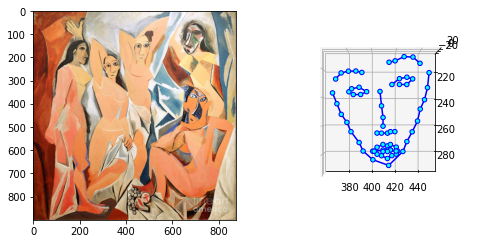

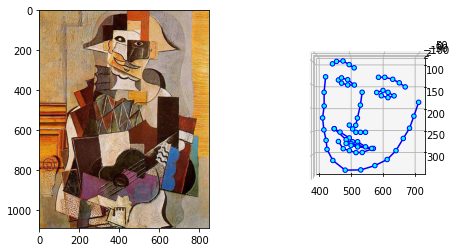

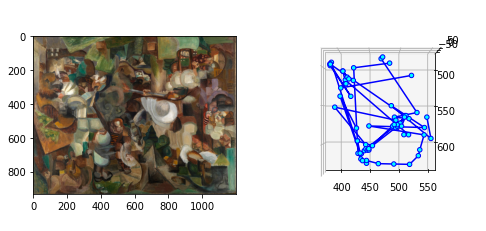

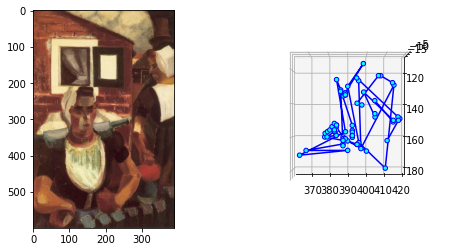

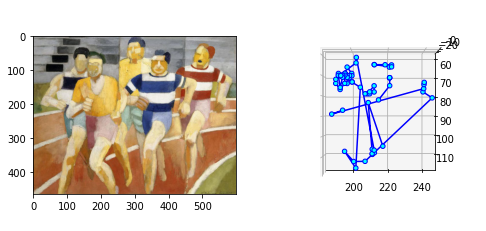

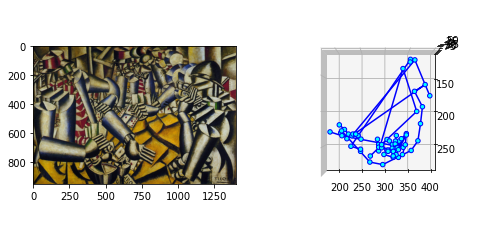

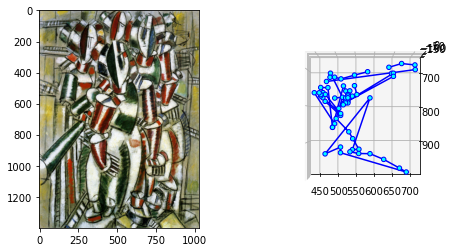

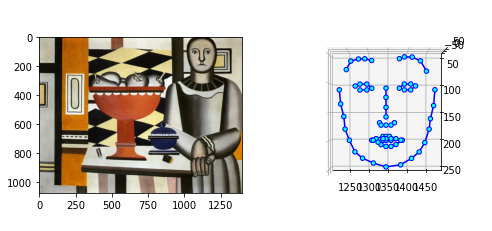

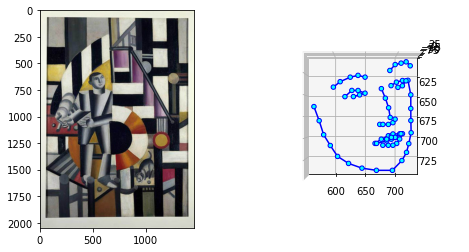

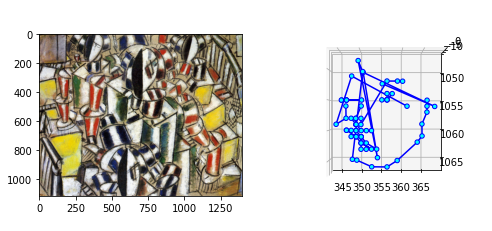

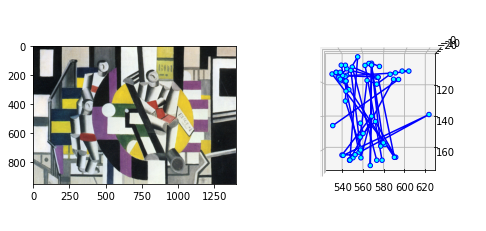

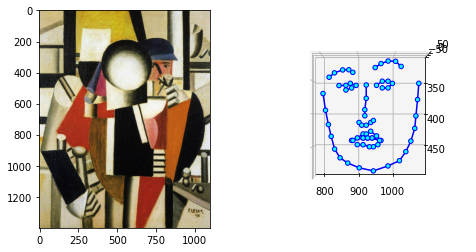

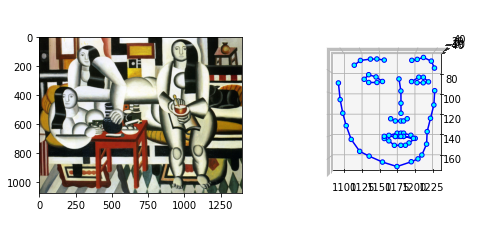

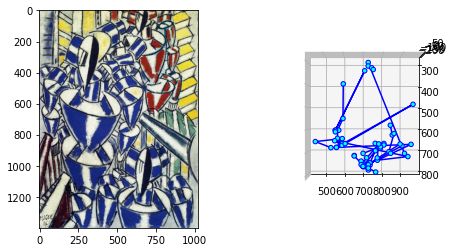

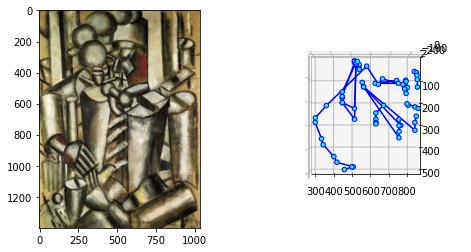

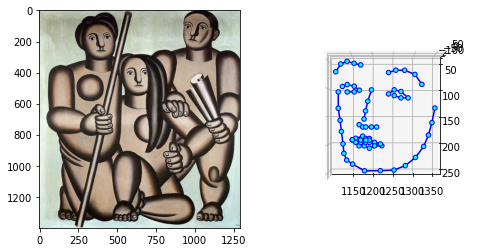

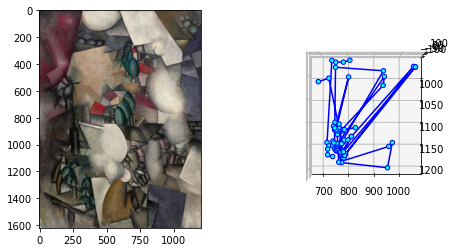

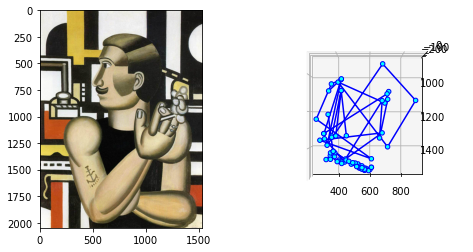

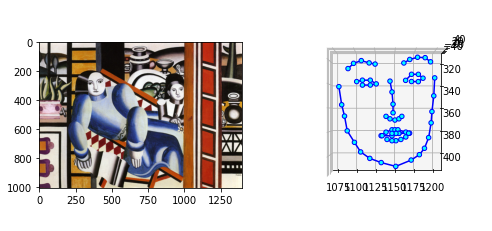

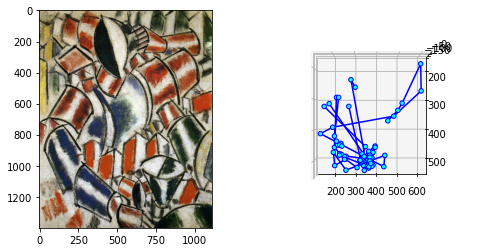

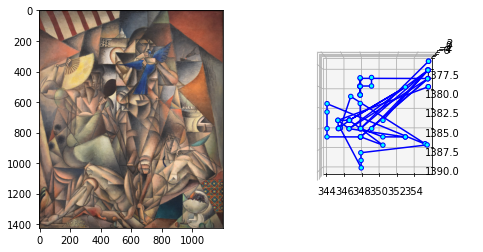

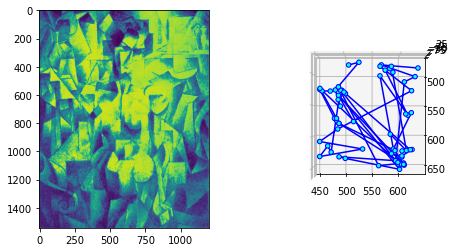

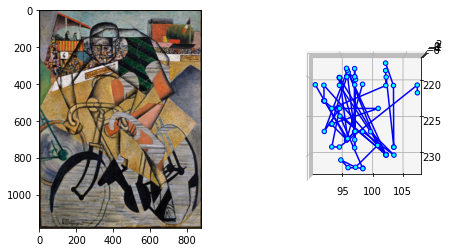

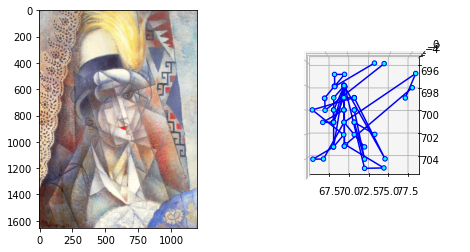

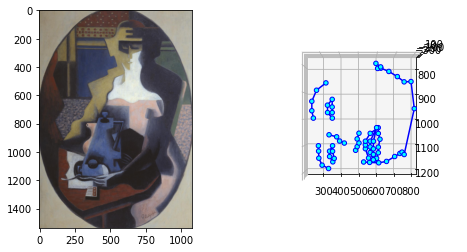

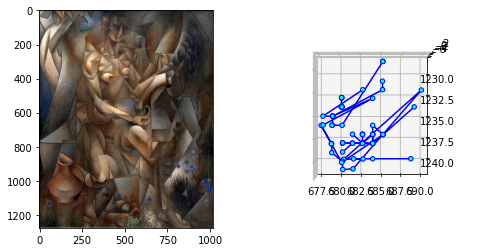

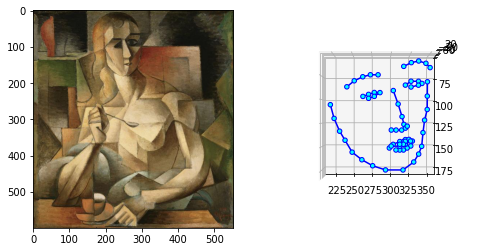

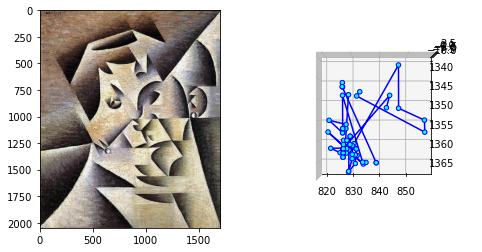

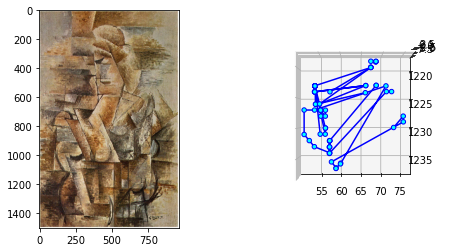

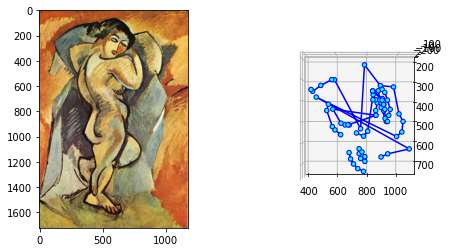

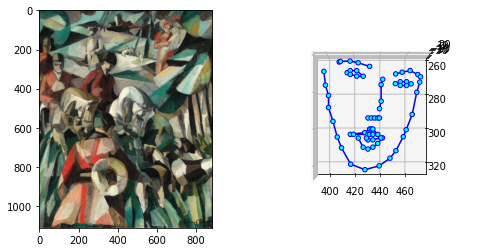

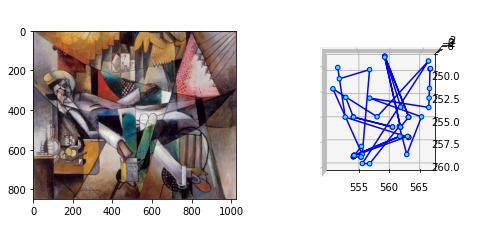

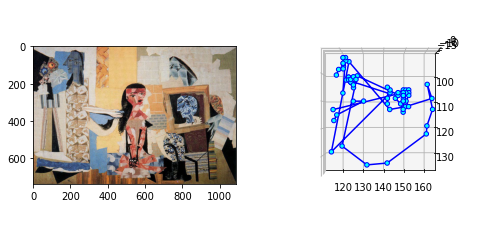

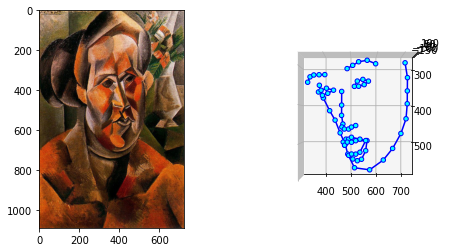

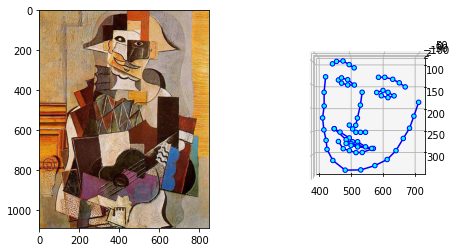

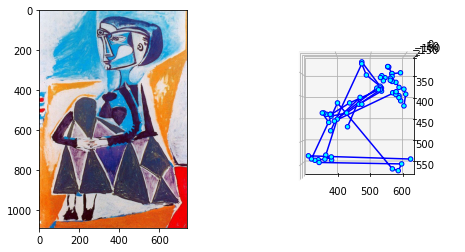

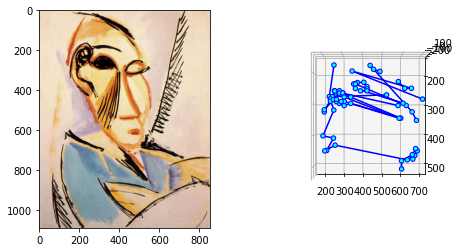

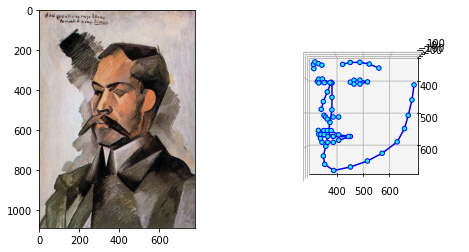

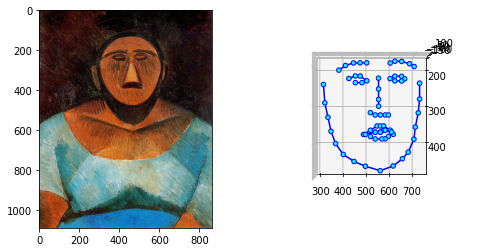

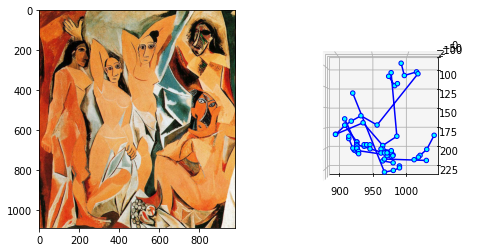

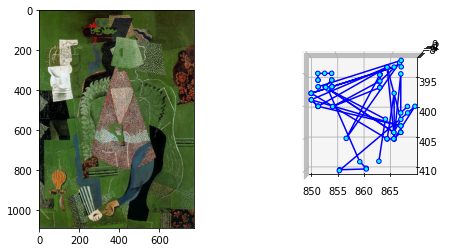

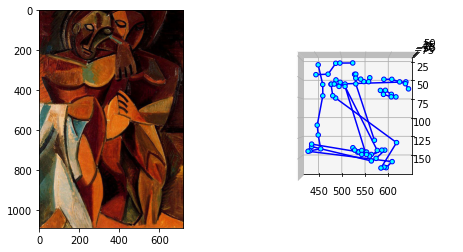

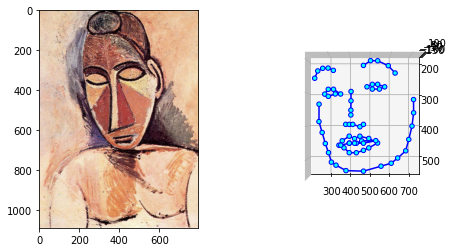

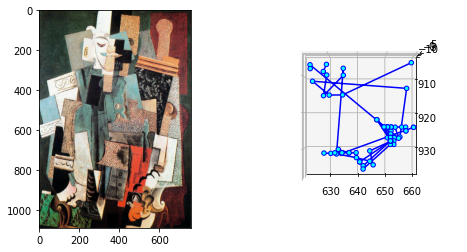

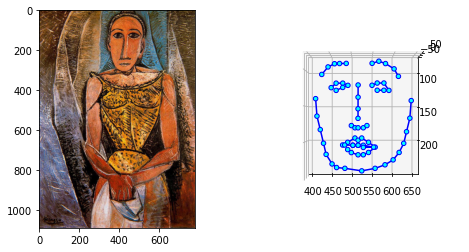

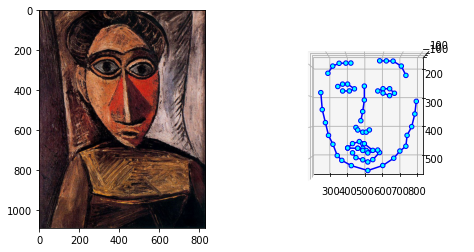

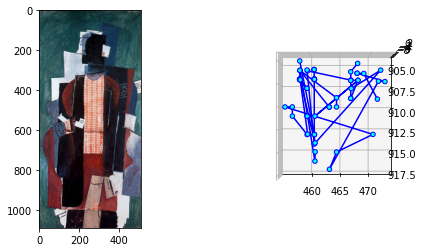

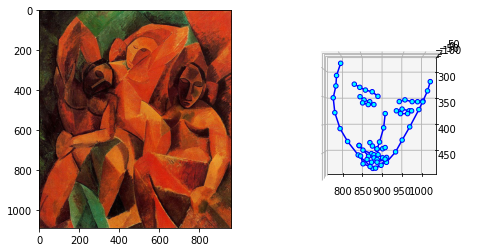

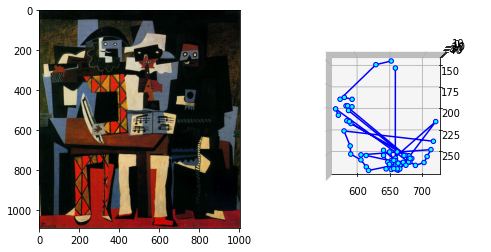

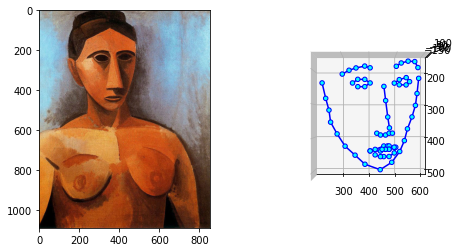

In [ ]:
#3D recognition with output
for artist in os.listdir(data_directory):
  print(artist)
  root = data_directory + artist
  output_dir = '/content/drive/MyDrive/Colab Notebooks/VLST209/Results_3D/' + artist + '_face_demo_3D'
  fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, face_detector='sfd', device='cpu')

  if not os.path.exists(output_dir):
      os.mkdir(output_dir)
    
  count = 0
  imgfiles = sorted(glob.glob(root + '/*'))

  for filename in os.listdir(root):
    print (count)
    try:
      save3d(root + '/' + filename, output_dir + '/' + filename, fa)
    except Exception as inst:
          print(inst) 
          continue
    count += 1

In [ ]:
#Image conversion testing for graph troubleshooting
from PIL import Image

im1 = Image.open(r'/content/drive/MyDrive/Colab Notebooks/VLST209/Victoire/Liotard_-_Portrait_of_a_Princess_of_France2_-_Stupinigi.png')
rgb_im = im1.convert('RGB')
rgb_im.save(r'/content/drive/MyDrive/Colab Notebooks/VLST209/Victoire/Liotard_-_Portrait_of_a_Princess_of_France2_-_Stupinigi.jpg')

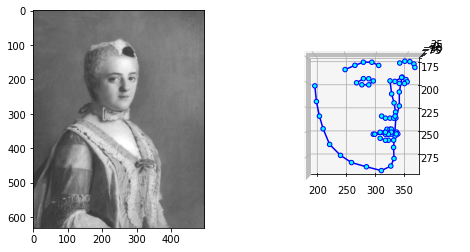

In [ ]:
#Experimentation for 3D
import PIL
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, face_detector='sfd', device='cpu')

root1 = '/content/drive/MyDrive/Colab Notebooks/VLST209/Victoire/Jean-Marc_Nattier,_Madame_Victoire_de_France_(1748).jpg'
root2 = '/content/drive/MyDrive/Colab Notebooks/VLST209/Victoire/Liotard_-_Portrait_of_a_Princess_of_France2_-_Stupinigi.jpg'

try:
    input_img = io.imread(root2)
except FileNotFoundError:
    input_img = io.imread(root2)
preds = fa.get_landmarks(input_img)[-1]


plot_style = dict(marker='o',
                  markersize=4,
                  linestyle='-',
                  lw=2)

pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
pred_types = {'face': pred_type(slice(0, 17), (0.682, 0.780, 0.909, 0.5)),
              'eyebrow1': pred_type(slice(17, 22), (1.0, 0.498, 0.055, 0.4)),
              'eyebrow2': pred_type(slice(22, 27), (1.0, 0.498, 0.055, 0.4)),
              'nose': pred_type(slice(27, 31), (0.345, 0.239, 0.443, 0.4)),
              'nostril': pred_type(slice(31, 36), (0.345, 0.239, 0.443, 0.4)),
              'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
              'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
              'lips': pred_type(slice(48, 60), (0.596, 0.875, 0.541, 0.3)),
              'teeth': pred_type(slice(60, 68), (0.596, 0.875, 0.541, 0.4))
              }

fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(input_img)


# 3D-Plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.scatter(preds[:, 0] * 1.2,
                  preds[:, 1],
                  preds[:, 2],
                  c='cyan',
                  alpha=1.0,
                  edgecolor='b')

for pred_type in pred_types.values():
    ax.plot3D(preds[pred_type.slice, 0] * 1.2,
              preds[pred_type.slice, 1],
              preds[pred_type.slice, 2], color='blue')

ax.view_init(elev=90., azim=90.)
ax.set_xlim(ax.get_xlim()[::-1])
plt.savefig(fname = '/content/drive/MyDrive/Colab Notebooks/VLST209/Victoire/egg.png')

In [ ]:
 # Function used to compute and save face mappings in 3D
 def save3d(path, outpath, fa):

  if '.png' in path:
    newpath = path.replace('.png', 'jpg')
    im1 = Image.open(repr(path))
    rgb_im = im1.convert('RGB')
    rgb_im.save(r(newpath))
    path = newpath

  try:
      input_img = io.imread(path)
  except FileNotFoundError:
      input_img = io.imread(path)
  preds = fa.get_landmarks(input_img)[-1]


  plot_style = dict(marker='o',
                  markersize=4,
                  linestyle='-',
                  lw=2)

  pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
  pred_types = {'face': pred_type(slice(0, 17), (0.682, 0.780, 0.909, 0.5)),
                'eyebrow1': pred_type(slice(17, 22), (1.0, 0.498, 0.055, 0.4)),
                'eyebrow2': pred_type(slice(22, 27), (1.0, 0.498, 0.055, 0.4)),
                'nose': pred_type(slice(27, 31), (0.345, 0.239, 0.443, 0.4)),
                'nostril': pred_type(slice(31, 36), (0.345, 0.239, 0.443, 0.4)),
                'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
                'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
                'lips': pred_type(slice(48, 60), (0.596, 0.875, 0.541, 0.3)),
                'teeth': pred_type(slice(60, 68), (0.596, 0.875, 0.541, 0.4))
                }

  fig = plt.figure(figsize=plt.figaspect(.5))
  ax = fig.add_subplot(1, 2, 1)
  ax.imshow(input_img)


  # 3D-Plot
  ax = fig.add_subplot(1, 2, 2, projection='3d')
  surf = ax.scatter(preds[:, 0] * 1.2,
                    preds[:, 1],
                    preds[:, 2],
                    c='cyan',
                    alpha=1.0,
                    edgecolor='b')

  for pred_type in pred_types.values():
      ax.plot3D(preds[pred_type.slice, 0] * 1.2,
                preds[pred_type.slice, 1],
                preds[pred_type.slice, 2], color='blue')

  ax.view_init(elev=90., azim=90.)
  ax.set_xlim(ax.get_xlim()[::-1])
  plt.savefig(fname = outpath)

In [ ]:
#Basic 2D recognition on cubist works - dlib
for artist in os.listdir(data_directory):
  print(artist)
  root = data_directory + artist
  output_dir = '/content/drive/MyDrive/Colab Notebooks/VLST209/Results_dlib/' + artist + '_face_demo'
  fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, face_detector='dlib', device='cpu')

  if not os.path.exists(output_dir):
      os.mkdir(output_dir)
    
  count = 0
  imgfiles = sorted(glob.glob(root + '/*'))

  for imgfile in tqdm(imgfiles):
    try:
      img = io.imread(imgfile)[:,:,:3]
      detected_faces = fa.face_detector.detect_from_image(img)

      print(len(detected_faces))
    
      for box in detected_faces:
          x1,y1,x2,y2,c = box # c for confidence
            
          box = np.array([x1,y1,x2-x1,y2-y1])
          x,y,w,h = dilate_bbox(box, scale=0.50).astype(int)
        
          if np.min([w,h])<100:
              continue
  
          crop = img[y:y+h, x:x+w]
          plt.imsave(output_dir+'/{:04d}.png'.format(count), crop)

          count += 1
    except Exception as inst:
          print(inst) 
          continue

Pablo Picasso


/usr/local/lib/python3.7/dist-packages/face_alignment/detection/dlib/dlib_detector.py:13: UserWarning: Warning: this detector is deprecated. Please use a different one, i.e.: S3FD.
  warnings.warn('Warning: this detector is deprecated. Please use a different one, i.e.: S3FD.')
  6%|▌         | 1/18 [00:00<00:16,  1.06it/s]

0


 11%|█         | 2/18 [00:01<00:13,  1.15it/s]

0


 17%|█▋        | 3/18 [00:02<00:11,  1.26it/s]

0


 22%|██▏       | 4/18 [00:03<00:11,  1.23it/s]

0


 28%|██▊       | 5/18 [00:04<00:11,  1.17it/s]

0


 33%|███▎      | 6/18 [00:04<00:10,  1.17it/s]

0


 39%|███▉      | 7/18 [00:05<00:09,  1.16it/s]

3
not enough values to unpack (expected 5, got 4)


 44%|████▍     | 8/18 [00:06<00:09,  1.09it/s]

0


 50%|█████     | 9/18 [00:07<00:08,  1.06it/s]

0


 56%|█████▌    | 10/18 [00:08<00:07,  1.08it/s]

0


 61%|██████    | 11/18 [00:09<00:06,  1.13it/s]

0


 67%|██████▋   | 12/18 [00:10<00:05,  1.19it/s]

0


 72%|███████▏  | 13/18 [00:11<00:04,  1.17it/s]

0


 78%|███████▊  | 14/18 [00:12<00:03,  1.06it/s]

0


 83%|████████▎ | 15/18 [00:13<00:02,  1.11it/s]

0


 89%|████████▉ | 16/18 [00:13<00:01,  1.14it/s]

0


 94%|█████████▍| 17/18 [00:14<00:00,  1.18it/s]

0


100%|██████████| 18/18 [00:15<00:00,  1.16it/s]

0
Henri Le Fauconnier



 25%|██▌       | 1/4 [00:00<00:02,  1.30it/s]

0


 50%|█████     | 2/4 [00:01<00:01,  1.24it/s]

0


 75%|███████▌  | 3/4 [00:02<00:00,  1.19it/s]

0


100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

0
Salvador Dali



 33%|███▎      | 1/3 [00:01<00:02,  1.04s/it]

0


 67%|██████▋   | 2/3 [00:01<00:01,  1.01s/it]

0


100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

0
Robert Delaunay



 33%|███▎      | 1/3 [00:00<00:01,  1.22it/s]

0


 67%|██████▋   | 2/3 [00:01<00:00,  1.24it/s]

0


100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

0
Fernand Leluger



  2%|▏         | 1/49 [00:00<00:45,  1.05it/s]

0


  4%|▍         | 2/49 [00:02<00:46,  1.00it/s]

0


  6%|▌         | 3/49 [00:03<00:45,  1.02it/s]

0


  8%|▊         | 4/49 [00:04<00:45,  1.01s/it]

0


 10%|█         | 5/49 [00:05<00:44,  1.00s/it]

0


 12%|█▏        | 6/49 [00:06<00:43,  1.02s/it]

0


 14%|█▍        | 7/49 [00:07<00:46,  1.12s/it]

0


 16%|█▋        | 8/49 [00:08<00:44,  1.08s/it]

0


 18%|█▊        | 9/49 [00:09<00:47,  1.19s/it]

0


 20%|██        | 10/49 [00:10<00:44,  1.14s/it]

0


 22%|██▏       | 11/49 [00:11<00:41,  1.09s/it]

0


 24%|██▍       | 12/49 [00:12<00:39,  1.08s/it]

0


 27%|██▋       | 13/49 [00:13<00:37,  1.04s/it]

0


 29%|██▊       | 14/49 [00:14<00:36,  1.05s/it]

0


 31%|███       | 15/49 [00:15<00:35,  1.04s/it]

0


 33%|███▎      | 16/49 [00:17<00:34,  1.05s/it]

0


 35%|███▍      | 17/49 [00:18<00:32,  1.03s/it]

0


 37%|███▋      | 18/49 [00:19<00:32,  1.04s/it]

0


 39%|███▉      | 19/49 [00:20<00:29,  1.00it/s]

0


 41%|████      | 20/49 [00:21<00:28,  1.00it/s]

0


 43%|████▎     | 21/49 [00:21<00:27,  1.01it/s]

0


 45%|████▍     | 22/49 [00:23<00:28,  1.07s/it]

0


 47%|████▋     | 23/49 [00:24<00:29,  1.12s/it]

1
not enough values to unpack (expected 5, got 4)


 49%|████▉     | 24/49 [00:25<00:26,  1.07s/it]

0


 51%|█████     | 25/49 [00:26<00:24,  1.03s/it]

0


 53%|█████▎    | 26/49 [00:27<00:23,  1.02s/it]

0


 55%|█████▌    | 27/49 [00:28<00:22,  1.01s/it]

0


 57%|█████▋    | 28/49 [00:29<00:21,  1.00s/it]

0


 59%|█████▉    | 29/49 [00:30<00:19,  1.03it/s]

0


 61%|██████    | 30/49 [00:31<00:20,  1.10s/it]

0


 63%|██████▎   | 31/49 [00:32<00:17,  1.05it/s]

0


 65%|██████▌   | 32/49 [00:33<00:15,  1.09it/s]

0


 67%|██████▋   | 33/49 [00:34<00:16,  1.01s/it]

0


 69%|██████▉   | 34/49 [00:35<00:15,  1.01s/it]

0


 71%|███████▏  | 35/49 [00:36<00:13,  1.02it/s]

0


 73%|███████▎  | 36/49 [00:37<00:12,  1.06it/s]

0


 76%|███████▌  | 37/49 [00:37<00:10,  1.12it/s]

0


 78%|███████▊  | 38/49 [00:38<00:10,  1.06it/s]

0


 80%|███████▉  | 39/49 [00:39<00:09,  1.06it/s]

3
not enough values to unpack (expected 5, got 4)


 82%|████████▏ | 40/49 [00:40<00:08,  1.12it/s]

0


 84%|████████▎ | 41/49 [00:41<00:07,  1.09it/s]

0


 86%|████████▌ | 42/49 [00:42<00:06,  1.09it/s]

2
not enough values to unpack (expected 5, got 4)


 88%|████████▊ | 43/49 [00:43<00:06,  1.06s/it]

0


 90%|████████▉ | 44/49 [00:44<00:05,  1.06s/it]

0


 92%|█████████▏| 45/49 [00:45<00:03,  1.02it/s]

0


 94%|█████████▍| 46/49 [00:46<00:02,  1.04it/s]

1
not enough values to unpack (expected 5, got 4)


 96%|█████████▌| 47/49 [00:47<00:01,  1.02it/s]

1
not enough values to unpack (expected 5, got 4)


 98%|█████████▊| 48/49 [00:48<00:00,  1.00it/s]

3
not enough values to unpack (expected 5, got 4)


100%|██████████| 49/49 [00:49<00:00,  1.02s/it]

0
Jean Metzinger



  7%|▋         | 1/15 [00:00<00:13,  1.02it/s]

0


 13%|█▎        | 2/15 [00:01<00:12,  1.01it/s]

0


 20%|██        | 3/15 [00:02<00:11,  1.05it/s]

0


 27%|██▋       | 4/15 [00:03<00:10,  1.03it/s]

0


 33%|███▎      | 5/15 [00:04<00:09,  1.03it/s]

0


 40%|████      | 6/15 [00:06<00:10,  1.12s/it]

0


 47%|████▋     | 7/15 [00:07<00:08,  1.09s/it]

0


 53%|█████▎    | 8/15 [00:08<00:07,  1.05s/it]

0


 60%|██████    | 9/15 [00:09<00:05,  1.03it/s]

0


 67%|██████▋   | 10/15 [00:09<00:04,  1.10it/s]

0


 73%|███████▎  | 11/15 [00:11<00:03,  1.02it/s]

too many indices for array: array is 2-dimensional, but 3 were indexed


 80%|████████  | 12/15 [00:11<00:02,  1.11it/s]

0


 87%|████████▋ | 13/15 [00:12<00:01,  1.12it/s]

0


 93%|█████████▎| 14/15 [00:13<00:00,  1.06it/s]

0


100%|██████████| 15/15 [00:14<00:00,  1.02it/s]

0
Piet Mondrian



100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

0
Juan Gris



  5%|▌         | 1/19 [00:00<00:15,  1.18it/s]

0


 11%|█         | 2/19 [00:01<00:14,  1.17it/s]

0


 16%|█▌        | 3/19 [00:02<00:13,  1.19it/s]

0


 21%|██        | 4/19 [00:03<00:12,  1.17it/s]

0


 26%|██▋       | 5/19 [00:04<00:12,  1.16it/s]

0


 32%|███▏      | 6/19 [00:05<00:11,  1.13it/s]

0


 37%|███▋      | 7/19 [00:06<00:10,  1.10it/s]

0


 42%|████▏     | 8/19 [00:06<00:09,  1.14it/s]

0


 47%|████▋     | 9/19 [00:07<00:08,  1.13it/s]

0


 53%|█████▎    | 10/19 [00:08<00:07,  1.15it/s]

1
not enough values to unpack (expected 5, got 4)


 58%|█████▊    | 11/19 [00:09<00:06,  1.15it/s]

0


 63%|██████▎   | 12/19 [00:10<00:06,  1.15it/s]

0


 68%|██████▊   | 13/19 [00:11<00:05,  1.15it/s]

0


 74%|███████▎  | 14/19 [00:12<00:04,  1.07it/s]

0


 79%|███████▉  | 15/19 [00:13<00:03,  1.10it/s]

0


 84%|████████▍ | 16/19 [00:14<00:03,  1.03s/it]

0


 89%|████████▉ | 17/19 [00:15<00:02,  1.03s/it]

0


 95%|█████████▍| 18/19 [00:16<00:00,  1.03it/s]

0


100%|██████████| 19/19 [00:17<00:00,  1.09it/s]

0
George Braques



 20%|██        | 1/5 [00:01<00:04,  1.02s/it]

1
not enough values to unpack (expected 5, got 4)


 40%|████      | 2/5 [00:01<00:02,  1.04it/s]

1
not enough values to unpack (expected 5, got 4)


 60%|██████    | 3/5 [00:02<00:01,  1.05it/s]

0


 80%|████████  | 4/5 [00:03<00:00,  1.10it/s]

0


100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

0
Albert Gleizes



  9%|▉         | 1/11 [00:00<00:07,  1.27it/s]

0


 18%|█▊        | 2/11 [00:01<00:07,  1.23it/s]

0


 27%|██▋       | 3/11 [00:02<00:07,  1.13it/s]

0


 36%|███▋      | 4/11 [00:03<00:05,  1.17it/s]

0


 45%|████▌     | 5/11 [00:04<00:05,  1.17it/s]

0


 55%|█████▍    | 6/11 [00:05<00:04,  1.04it/s]

0


 64%|██████▎   | 7/11 [00:06<00:03,  1.07it/s]

0


 73%|███████▎  | 8/11 [00:07<00:02,  1.07it/s]

1
not enough values to unpack (expected 5, got 4)


 82%|████████▏ | 9/11 [00:08<00:01,  1.09it/s]

0


 91%|█████████ | 10/11 [00:09<00:00,  1.10it/s]

0


100%|██████████| 11/11 [00:09<00:00,  1.11it/s]

0
_Picasso No Name



  1%|          | 1/101 [00:00<01:23,  1.20it/s]

0


  2%|▏         | 2/101 [00:01<01:29,  1.10it/s]

0


  3%|▎         | 3/101 [00:02<01:26,  1.14it/s]

0


  4%|▍         | 4/101 [00:03<01:26,  1.12it/s]

0


  5%|▍         | 5/101 [00:04<01:25,  1.12it/s]

0


  6%|▌         | 6/101 [00:05<01:24,  1.13it/s]

0


  7%|▋         | 7/101 [00:06<01:21,  1.15it/s]

0


  8%|▊         | 8/101 [00:07<01:21,  1.14it/s]

0


  9%|▉         | 9/101 [00:07<01:17,  1.19it/s]

0


 10%|▉         | 10/101 [00:08<01:16,  1.19it/s]

0


 11%|█         | 11/101 [00:09<01:17,  1.16it/s]

0


 12%|█▏        | 12/101 [00:10<01:18,  1.13it/s]

0


 13%|█▎        | 13/101 [00:11<01:16,  1.15it/s]

0


 14%|█▍        | 14/101 [00:12<01:17,  1.13it/s]

0


 15%|█▍        | 15/101 [00:13<01:15,  1.14it/s]

0


 16%|█▌        | 16/101 [00:14<01:15,  1.13it/s]

0


 17%|█▋        | 17/101 [00:14<01:13,  1.15it/s]

0


 18%|█▊        | 18/101 [00:15<01:12,  1.15it/s]

0


 19%|█▉        | 19/101 [00:16<01:10,  1.17it/s]

0


 20%|█▉        | 20/101 [00:17<01:08,  1.19it/s]

0


 21%|██        | 21/101 [00:18<01:06,  1.21it/s]

0


 22%|██▏       | 22/101 [00:19<01:05,  1.20it/s]

0


 23%|██▎       | 23/101 [00:20<01:19,  1.02s/it]

0


 24%|██▍       | 24/101 [00:21<01:10,  1.09it/s]

0


 25%|██▍       | 25/101 [00:22<01:08,  1.10it/s]

0


 26%|██▌       | 26/101 [00:23<01:08,  1.10it/s]

0


 27%|██▋       | 27/101 [00:23<01:06,  1.11it/s]

0


 28%|██▊       | 28/101 [00:24<01:05,  1.12it/s]

0


 29%|██▊       | 29/101 [00:25<01:04,  1.11it/s]

0


 30%|██▉       | 30/101 [00:26<01:02,  1.14it/s]

0


 31%|███       | 31/101 [00:27<01:00,  1.16it/s]

0


 32%|███▏      | 32/101 [00:28<01:00,  1.15it/s]

0


 33%|███▎      | 33/101 [00:29<00:59,  1.14it/s]

0


 34%|███▎      | 34/101 [00:29<00:54,  1.24it/s]

0


 35%|███▍      | 35/101 [00:30<00:55,  1.19it/s]

0


 36%|███▌      | 36/101 [00:31<00:54,  1.20it/s]

0


 37%|███▋      | 37/101 [00:32<00:54,  1.17it/s]

1
not enough values to unpack (expected 5, got 4)


 38%|███▊      | 38/101 [00:33<00:50,  1.24it/s]

0


 39%|███▊      | 39/101 [00:33<00:47,  1.31it/s]

0


 40%|███▉      | 40/101 [00:34<00:47,  1.27it/s]

0


 41%|████      | 41/101 [00:35<00:48,  1.24it/s]

0


 42%|████▏     | 42/101 [00:36<00:48,  1.22it/s]

0


 43%|████▎     | 43/101 [00:37<00:48,  1.20it/s]

0


 44%|████▎     | 44/101 [00:37<00:43,  1.30it/s]

0


 45%|████▍     | 45/101 [00:38<00:44,  1.25it/s]

1
not enough values to unpack (expected 5, got 4)


 46%|████▌     | 46/101 [00:39<00:44,  1.24it/s]

0


 47%|████▋     | 47/101 [00:40<00:44,  1.21it/s]

0


 48%|████▊     | 48/101 [00:41<00:43,  1.21it/s]

1
not enough values to unpack (expected 5, got 4)


 49%|████▊     | 49/101 [00:42<00:43,  1.20it/s]

0


 50%|████▉     | 50/101 [00:42<00:42,  1.20it/s]

0


 50%|█████     | 51/101 [00:43<00:41,  1.19it/s]

1
not enough values to unpack (expected 5, got 4)


 51%|█████▏    | 52/101 [00:44<00:42,  1.16it/s]

0


 52%|█████▏    | 53/101 [00:45<00:41,  1.17it/s]

0


 53%|█████▎    | 54/101 [00:46<00:41,  1.14it/s]

0


 54%|█████▍    | 55/101 [00:47<00:38,  1.20it/s]

0


 55%|█████▌    | 56/101 [00:47<00:36,  1.22it/s]

0


 56%|█████▋    | 57/101 [00:48<00:36,  1.21it/s]

0


 57%|█████▋    | 58/101 [00:49<00:35,  1.20it/s]

0


 58%|█████▊    | 59/101 [00:50<00:35,  1.18it/s]

0


 59%|█████▉    | 60/101 [00:51<00:35,  1.14it/s]

0


 60%|██████    | 61/101 [00:52<00:33,  1.21it/s]

0


 61%|██████▏   | 62/101 [00:52<00:31,  1.24it/s]

0


 62%|██████▏   | 63/101 [00:53<00:31,  1.21it/s]

0


 63%|██████▎   | 64/101 [00:54<00:31,  1.18it/s]

0


 64%|██████▍   | 65/101 [00:55<00:28,  1.26it/s]

0


 65%|██████▌   | 66/101 [00:56<00:28,  1.25it/s]

0


 66%|██████▋   | 67/101 [00:56<00:25,  1.32it/s]

0


 67%|██████▋   | 68/101 [00:57<00:24,  1.35it/s]

2
not enough values to unpack (expected 5, got 4)


 68%|██████▊   | 69/101 [00:58<00:24,  1.30it/s]

0


 69%|██████▉   | 70/101 [00:59<00:24,  1.27it/s]

0


 70%|███████   | 71/101 [01:00<00:25,  1.20it/s]

0


 71%|███████▏  | 72/101 [01:00<00:22,  1.28it/s]

0


 72%|███████▏  | 73/101 [01:01<00:22,  1.25it/s]

0


 73%|███████▎  | 74/101 [01:02<00:21,  1.25it/s]

0


 74%|███████▍  | 75/101 [01:03<00:20,  1.28it/s]

0


 75%|███████▌  | 76/101 [01:03<00:18,  1.34it/s]

0


 76%|███████▌  | 77/101 [01:04<00:18,  1.29it/s]

0


 77%|███████▋  | 78/101 [01:05<00:18,  1.23it/s]

0


 78%|███████▊  | 79/101 [01:06<00:18,  1.17it/s]

0


 79%|███████▉  | 80/101 [01:07<00:17,  1.17it/s]

0


 80%|████████  | 81/101 [01:08<00:17,  1.16it/s]

0


 81%|████████  | 82/101 [01:09<00:16,  1.15it/s]

0


 82%|████████▏ | 83/101 [01:10<00:15,  1.15it/s]

0


 83%|████████▎ | 84/101 [01:10<00:14,  1.18it/s]

0


 84%|████████▍ | 85/101 [01:11<00:13,  1.19it/s]

0


 85%|████████▌ | 86/101 [01:12<00:12,  1.18it/s]

0


 86%|████████▌ | 87/101 [01:13<00:11,  1.24it/s]

0


 87%|████████▋ | 88/101 [01:13<00:10,  1.24it/s]

0


 88%|████████▊ | 89/101 [01:14<00:09,  1.22it/s]

0


 89%|████████▉ | 90/101 [01:15<00:08,  1.27it/s]

1
not enough values to unpack (expected 5, got 4)


 90%|█████████ | 91/101 [01:16<00:07,  1.31it/s]

0


 91%|█████████ | 92/101 [01:17<00:07,  1.27it/s]

0


 92%|█████████▏| 93/101 [01:17<00:06,  1.27it/s]

0


 93%|█████████▎| 94/101 [01:18<00:05,  1.33it/s]

0


 94%|█████████▍| 95/101 [01:19<00:04,  1.29it/s]

0


 95%|█████████▌| 96/101 [01:20<00:03,  1.25it/s]

0


 96%|█████████▌| 97/101 [01:21<00:03,  1.26it/s]

0


 97%|█████████▋| 98/101 [01:21<00:02,  1.25it/s]

0


 98%|█████████▊| 99/101 [01:22<00:01,  1.26it/s]

0


 99%|█████████▉| 100/101 [01:23<00:00,  1.26it/s]

1
not enough values to unpack (expected 5, got 4)


100%|██████████| 101/101 [01:24<00:00,  1.20it/s]

0


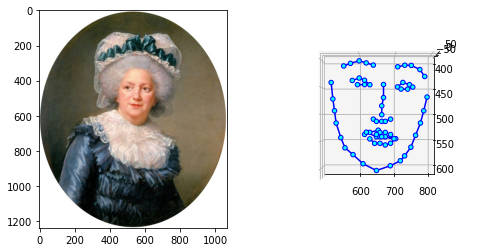

In [ ]:
#Testing cell for save3d function
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, face_detector='sfd', device='cpu')
save3d('/content/drive/MyDrive/Colab Notebooks/VLST209/Victoire/Madame_Victoire_de_France_by_E.Vigee-Lebrun_(1791,_Phoenix).jpg', fa)

In [8]:
#Creates dictionary of number of paintings for each artist
num_pics = {}
for artist in os.listdir(data_directory):
  num_results = len([name for name in os.listdir(data_directory + artist)])
  num_pics[artist] = num_results
print(num_pics)

{'Pablo Picasso': 18, 'Henri Le Fauconnier': 4, 'Salvador Dali': 3, 'Robert Delaunay': 3, 'Fernand Leluger': 49, 'Jean Metzinger': 15, 'Piet Mondrian': 1, 'Juan Gris': 19, 'George Braques': 5, 'Albert Gleizes': 11, '_Picasso No Name': 101}


In [17]:
#Function to compute ratio of faces detected to paintings per artist
def calcacc (folder):
  accs = {}
  for artist in os.listdir('/content/drive/MyDrive/Colab Notebooks/VLST209/' + folder):
    num_results = len([name for name in os.listdir('/content/drive/MyDrive/Colab Notebooks/VLST209/' + folder + '/' + artist)])
    artist_name = artist.replace('_3D', '')
    artist_name = artist_name.replace('_face_demo', '')
    accs[artist_name] = num_results / num_pics[artist_name]
  print(accs)
  return accs

In [18]:
ratios_1 = calcacc('Results')
ratios_2 = calcacc('Results2')
ratios_3d = calcacc('Results_3D')

{'Pablo Picasso': 0.1111111111111111, 'Henri Le Fauconnier': 0.25, 'Salvador Dali': 0.0, 'Robert Delaunay': 0.0, 'Fernand Leluger': 0.22448979591836735, 'Jean Metzinger': 0.13333333333333333, 'Piet Mondrian': 0.0, 'Juan Gris': 0.0, 'George Braques': 0.2, 'Albert Gleizes': 0.09090909090909091, '_Picasso No Name': 0.10891089108910891}
{'Pablo Picasso': 0.1111111111111111, 'Henri Le Fauconnier': 1.0, 'Salvador Dali': 0.0, 'Robert Delaunay': 0.0, 'Fernand Leluger': 0.3877551020408163, 'Jean Metzinger': 0.2, 'Piet Mondrian': 0.0, 'Juan Gris': 0.0, 'George Braques': 0.4, 'Albert Gleizes': 0.09090909090909091, '_Picasso No Name': 0.1485148514851485}
{'Pablo Picasso': 0.1111111111111111, 'Henri Le Fauconnier': 0.5, 'Salvador Dali': 0.0, 'Robert Delaunay': 0.3333333333333333, 'Fernand Leluger': 0.30612244897959184, 'Jean Metzinger': 0.4666666666666667, 'Piet Mondrian': 0.0, 'Juan Gris': 0.05263157894736842, 'George Braques': 0.4, 'Albert Gleizes': 0.18181818181818182, '_Picasso No Name': 0.1782

In [25]:
#Merge all dictionatries
ds = [ratios_1, ratios_2, ratios_3d]
d = {}
for k in ratios_1.keys():
  d[k] = list(d[k] for d in ds)
print(d)

{'Pablo Picasso': [0.1111111111111111, 0.1111111111111111, 0.1111111111111111], 'Henri Le Fauconnier': [0.25, 1.0, 0.5], 'Salvador Dali': [0.0, 0.0, 0.0], 'Robert Delaunay': [0.0, 0.0, 0.3333333333333333], 'Fernand Leluger': [0.22448979591836735, 0.3877551020408163, 0.30612244897959184], 'Jean Metzinger': [0.13333333333333333, 0.2, 0.4666666666666667], 'Piet Mondrian': [0.0, 0.0, 0.0], 'Juan Gris': [0.0, 0.0, 0.05263157894736842], 'George Braques': [0.2, 0.4, 0.4], 'Albert Gleizes': [0.09090909090909091, 0.09090909090909091, 0.18181818181818182], '_Picasso No Name': [0.10891089108910891, 0.1485148514851485, 0.1782178217821782]}


In [34]:
ratios_1['Pablo Picasso'] = ratios_1['Pablo Picasso'] + ratios_1['_Picasso No Name']
ratios_1.pop('_Picasso No Name', None)
print(ratios_1)

{'Pablo Picasso': 0.22002200220022, 'Henri Le Fauconnier': 0.25, 'Salvador Dali': 0.0, 'Robert Delaunay': 0.0, 'Fernand Leluger': 0.22448979591836735, 'Jean Metzinger': 0.13333333333333333, 'Piet Mondrian': 0.0, 'Juan Gris': 0.0, 'George Braques': 0.2, 'Albert Gleizes': 0.09090909090909091}


In [35]:
ratios_2['Pablo Picasso'] = ratios_2['Pablo Picasso'] + ratios_2['_Picasso No Name']
ratios_2.pop('_Picasso No Name', None)
print(ratios_2)

{'Pablo Picasso': 0.2596259625962596, 'Henri Le Fauconnier': 1.0, 'Salvador Dali': 0.0, 'Robert Delaunay': 0.0, 'Fernand Leluger': 0.3877551020408163, 'Jean Metzinger': 0.2, 'Piet Mondrian': 0.0, 'Juan Gris': 0.0, 'George Braques': 0.4, 'Albert Gleizes': 0.09090909090909091}


In [36]:
ratios_3d['Pablo Picasso'] = ratios_3d['Pablo Picasso'] + ratios_3d['_Picasso No Name']
ratios_3d.pop('_Picasso No Name', None)
print(ratios_3d)

{'Pablo Picasso': 0.2893289328932893, 'Henri Le Fauconnier': 0.5, 'Salvador Dali': 0.0, 'Robert Delaunay': 0.3333333333333333, 'Fernand Leluger': 0.30612244897959184, 'Jean Metzinger': 0.4666666666666667, 'Piet Mondrian': 0.0, 'Juan Gris': 0.05263157894736842, 'George Braques': 0.4, 'Albert Gleizes': 0.18181818181818182}


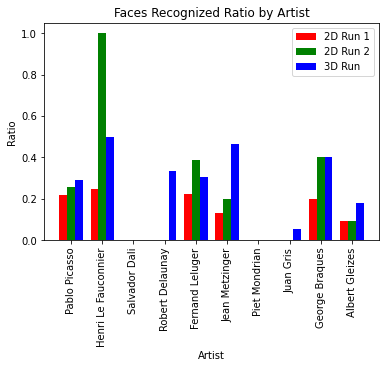

In [37]:
#Visualize Accuracies
N = 10
ind = np.arange(N) 
width = 0.25
  
xvals = list(ratios_1.values())
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = list(ratios_2.values())
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = list(ratios_3d.values())
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.xlabel("Artist")
plt.ylabel('Ratio')
plt.title("Faces Recognized Ratio by Artist")
  
plt.xticks(ind+width,list(ratios_2.keys()), rotation = 90)
plt.legend( (bar1, bar2, bar3), ('2D Run 1', '2D Run 2', '3D Run') )
plt.show()